### Урок 7. Линейная регрессия

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from itertools import combinations
from scipy import stats
from matplotlib import pyplot as plot
from IPython.display import Image

plot.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

#### Задание 1
Дана матрица объект-признак: <br>
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]
<br>
<br>
и значения целевой переменной: <br>
y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]
<br>
<br>
Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. <br>
Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. <br>
Является ли значимым получившееся уравнение регрессии?

Решение: <br>

Найдем модель линейной регрессии, которая дает максимальный результат на 2 признаках.

In [2]:
# Рассмотрим все возможные комбинации 4-х признаков
features_array = ['A', 'B', 'C', 'D']
features_combinations = combinations(features_array, 2)

# Объединим признаки в Dataframe, целевой признак - отдельный массив
array_X = np.array([[1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [0.75129018, 2.67392052, 3.65529809, 1.66746094], [0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [2.29536229, 1.81206697, 1.95026215, 1.51874636], [0.0920418 , 2.26971361, 7.47708735, 2.61081203], [2.39252799, 3.17563985, 3.61420599, 5.10773362], [0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

X = pd.DataFrame(array_X, columns =['A', 'B', 'C', 'D'])

# Создадим все возможные комбинации признаков
X_combinations = [X[list(item)].values for item in list(features_combinations)]

# Построим модели с комбинациями признаков из списка X_combinations и целевой переменной y
# Рассмотрим коэффициенты детерминации (R^2) построенных моделей
models = []
scores = []
counter = 0
for item in X_combinations:
    models.append(LinearRegression().fit(item, y))
    scores.append(models[counter].score(X_combinations[counter], y))
    print(f'Модель{counter + 1}:\n{type(models[counter])}')
    print(f'Коэффициент уравнения b0: {models[counter].intercept_}')
    print(f'Коэффициент уравнения b1, b2: {models[counter].coef_}')
    print(f'Коэффициент детерминации R^2: {scores[counter]}')
    print(f'--------------------------------------------------\n')
    counter += 1

Модель1:
<class 'sklearn.linear_model._base.LinearRegression'>
Коэффициент уравнения b0: 6.70781579049774
Коэффициент уравнения b1, b2: [0.40786841 1.03360247]
Коэффициент детерминации R^2: 0.18113594742585204
--------------------------------------------------

Модель2:
<class 'sklearn.linear_model._base.LinearRegression'>
Коэффициент уравнения b0: 3.6245569493851137
Коэффициент уравнения b1, b2: [1.62531203 1.21134979]
Коэффициент детерминации R^2: 0.763424623879315
--------------------------------------------------

Модель3:
<class 'sklearn.linear_model._base.LinearRegression'>
Коэффициент уравнения b0: 5.7068612323509935
Коэффициент уравнения b1, b2: [0.68359949 1.12650707]
Коэффициент детерминации R^2: 0.4532966783144078
--------------------------------------------------

Модель4:
<class 'sklearn.linear_model._base.LinearRegression'>
Коэффициент уравнения b0: 2.488961928568431
Коэффициент уравнения b1, b2: [1.60611956 0.86269915]
Коэффициент детерминации R^2: 0.5479482734039008
---

In [3]:
# Найдем наибольший коэффициент детерминации R^2
max_R2 = max(scores)
print("Наибольший коэффициент детерминации R^2:", max_R2)

Наибольший коэффициент детерминации R^2: 0.763424623879315


Проверим, является ли значимым получившееся уравнение регрессии. <br>
Для таких целей существует __F-тест Фишера__. <br>
<br>
Формально при таком тесте проверяется нулевая гипотеза о том, что теоретический коэффициент детерминации (т.е. для модели, построенной для случайных величин) равен $0$, т.е. что в имеющихся данных вообще нет никакой зависимости. <br>
<br>
При F-тесте используется статистика: <br>
$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$ <br>
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. <br>
<br>
Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами: <br>
$k_1 = m$, $k_2 = n - m - 1$. <br>
<br>
Возьмём уровень значимости $\alpha = 0.05$. <br>
Нужный нам квантиль можно посчитать с помощью функции `scipy.stats.f.ppf`.

In [4]:
n = X_combinations[1].shape[0]
m = X_combinations[1].shape[1]

k1 = m
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Получаем критическую область: <br>
$\Omega_\alpha = \left(4.73741412777588, \infty \right)$

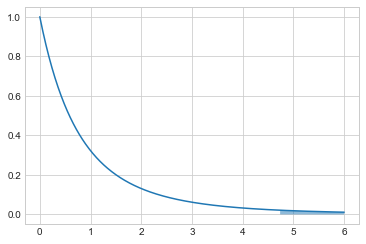

In [5]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plot.plot(ox, oy)
plot.fill_between(ox_right, oy_right, alpha=0.5)

Считаем значение статистики F:

In [6]:
F = (max_R2 / k1) / ((1 - max_R2) / k2)
F

11.294439122922636

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

#### Задание 2
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring): <br>
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110] <br>
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832] <br>
<br>
Возьмём в качестве признака значение salary (X), а в качестве целевой переменной - scoring (Y).<br>
<br>
Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов. <br>
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1. <br>
Посчитайте коэффициент детерминации. <br>
Оцените построенное уравнение регрессии с помощью F-критерия Фишера. <br>
Посчитать среднюю ошибку аппроксимации. <br>

In [7]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдём коэффициенты парной линейной регрессии. <br>
Коэффициенты парной регрессии можно найти по формуле: <br>
$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$

In [8]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1

(444.1773573243596, 2.620538882402765)

Итак, модель линейной регрессии имеет вид: <br>
$y = 444.1773573243596 + 2.620538882402765 \cdot x.$

Найдём коэффициенты парной линейной регрессии с помощью метода наименьших квадратов.

Метод наименьших квадратов заключается в минимизации расстояния между векторами $Y$ и $X \cdot b$: <br>
$\| Y - X \cdot b \| \rightarrow \min_b$ <br>
<br>
При этом вводится дополнительное условие на среднюю ошибку: <br>
$\overline{E} = 0,$ <br>
где $E = Y - X \cdot b$. <br>
<br>
Решение такой оптимизационной задачи даёт коэффициенты линейной регрессии: <br>
$b = (X^\top X)^{-1} X^\top Y$

К матрице $X$ (массив salary) нужно также добавить столбец из  1, соответствующий фиктивному фактору.

In [9]:
ones = np.ones(salary.shape[0])
salary = np.vstack((ones, salary)).T

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [10]:
XTX = salary.T.dot(salary)
det_XTX = np.linalg.det(XTX)
det_XTX

349464.00000000023

Определитель не близок к нулю, поэтому проблем с методом нет. <br>
Коэффициенты модели:

In [11]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(salary.T).dot(scoring)
print(b)

[444.17735732   2.62053888]


Итак, модель линейной регрессии имеет вид: <br>
$y = 444.17735732 + 2.62053888 \cdot x.$ <br>
<br>
Полученные коэффициенты совпадают с коэффициентами, полученными ранее.

Построим scatter plot по данным и отметим на нём прямую линейной регрессии, полученную в п. 1.

Text(0, 0.5, 'Scoring')

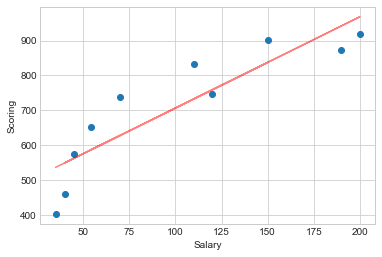

In [12]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

ox = salary
oy = b0 + b1 * ox

plot.scatter(salary, scoring)
plot.plot(ox, oy, color='red', alpha=0.5)

plot.xlabel('Salary')
plot.ylabel('Scoring')

Посчитаем коэффициент детерминации вручную.

In [13]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

z = b0 + b1 * salary

R = 1 - ((scoring - z)**2).sum() / sum_of_squares(scoring)
R

0.7876386635293686

Посчитаем коэффициент детерминации программно.

In [14]:
ones = np.ones(salary.shape[0])
salary = np.vstack((ones, salary)).T

model_salary_scoring = LinearRegression().fit(salary, scoring)
score_salary_scoring = model_salary_scoring.score(salary, scoring)

print(f'Модель:\n{type(model_salary_scoring)}')
print(f'Коэффициент уравнения b0: {model_salary_scoring.intercept_}')
print(f'Коэффициент уравнения b1, b2: {model_salary_scoring.coef_}')
print(f'Коэффициент детерминации R^2: {score_salary_scoring}')
print(f'--------------------------------------------------')

Модель:
<class 'sklearn.linear_model._base.LinearRegression'>
Коэффициент уравнения b0: 444.1773573243595
Коэффициент уравнения b1, b2: [0.         2.62053888]
Коэффициент детерминации R^2: 0.7876386635293685
--------------------------------------------------


Оценим построенное уравнение регрессии с помощью F-критерия Фишера. <br>
Возьмём уровень значимости $\alpha = 0.05$. <br>
Нужный нам квантиль можно посчитать с помощью функции `scipy.stats.f.ppf`.

In [15]:
n = salary.shape[0]
m = 1

k1 = m
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Получаем критическую область: <br>
$\Omega_\alpha = \left(5.317655071578714, \infty \right)$

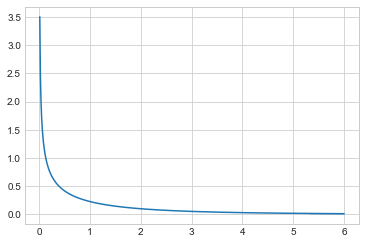

In [16]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plot.plot(ox, oy)
plot.fill_between(ox_right, oy_right, alpha=0.5)

Считаем значение статистики F:

In [17]:
F = (max_R2 / k1) / ((1 - max_R2) / k2)
F

25.815860852394596

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

Посчитаем среднюю ошибку аппроксимации.

In [18]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

mean_approximation_error(scoring, z)

0.11469251843561709